# Exploratory Data Analysis (EDA)

EDA is an important step in ML project. This is where we get to dig into the data, trying to understand more about it.

By performing EDA, we can:

* Know the summary statistics
* Spot if there are missing values and the appropriate strategy for handling it
* Spot if the data is skewed (or imbalanced)
* Correlation between features
* Understand the important features (or attributes) worth keeping and unhelpful features
* Above all, answer some of the pressing questions about the data. These questions can be specific to data and its features but will be around things like why this and this, or what could have caused this and this based on the analysis, etc...There are no right or wrong questions, the idea here is to use data to see if we can help answer some questions.

### Real World Data Exploratory Analysis : Titanic
In this lab, we will use Titanic dataset which is available on Kaggle. We can also load it from Seaborn datasets but we will use the real data from [Kaggle](https://www.kaggle.com/c/titanic/data).

Contents:

* 1. [Imports](#1)
* 2. [Loading the dataset](#2)
* 3. [Quick look into the dataset](#3)
* 4. [Summary statistics](#4)
* 5. [Basic information](#5)
* 6. [Missing data](#6)
* 7. [More analysis](#7)
* 8. [Checking feature correlations](#8)



<a name='1'></a>
## 1.Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

<a name='2'></a>
## 2. Loading the dataset

In [4]:
titanic = sns.load_dataset('titanic')

If the data was coming from external sources say `csv`, we could have used Pandas to read the file.
```
titanic = pd.read_csv('....'
```

<a name='3'></a>
## 3. Quick look into the dataset


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


By defualt, titanic.head() will display the first five rows. But can you display the rows you want, just pass the integer. Example: `titanic.head(10)`..`tail()` will display the last rows

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


<a name='4'></a>
## 4. Summary statistics

In [7]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<a name='5'></a>
## 5. Basic Information

1. How many people who survived and died from the titanic crash? Can you use the appropriate visualization to show these people?


In [9]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

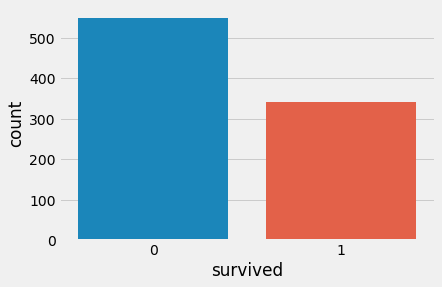

In [10]:
sns.countplot(data=titanic, x='survived')

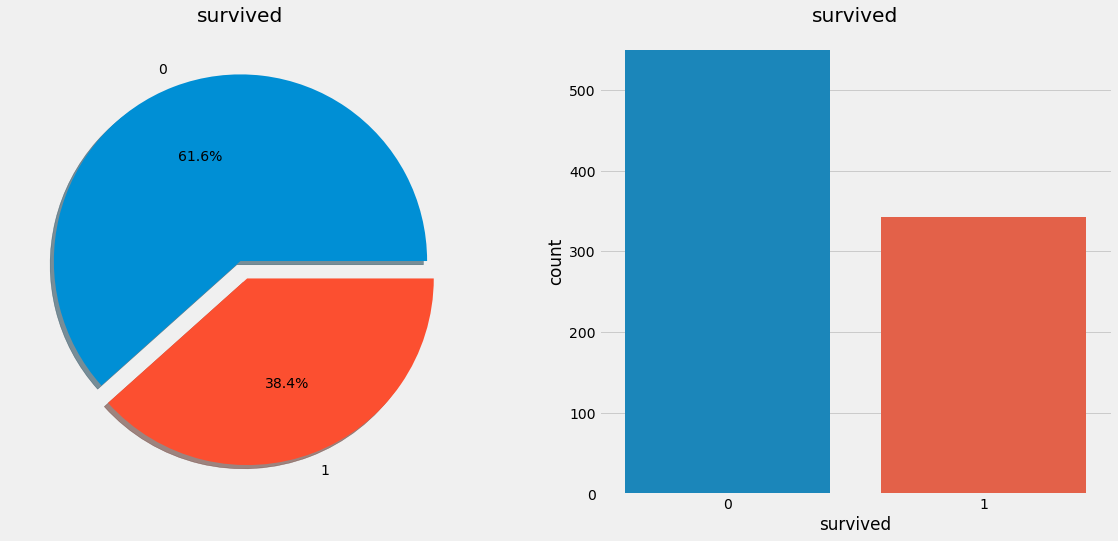

In [11]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
titanic['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('survived')
ax[0].set_ylabel('')
sns.countplot(x = 'survived', data=titanic, ax=ax[1])
ax[1].set_title('survived')
plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Passenger Class, Sex, Port Of Embarcation, Age,etc.

First let us understand the different types of features.

### Types Of Features

### 1. <u>Categorical Features:</u>

A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as *Nominal Variables*.

*Categorical Features in the dataset: `Sex`,`Embarked`.*

### 2. <u>Ordinal Features:</u>
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like *Height* with values *Tall, Medium, Short*, then Height is a ordinal variable. Here we can have a relative sort in the variable.

*Ordinal Features in the dataset: `PClass`*

### 3. <u>Continous Feature:</u>
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

*Continous Features in the dataset: `Age` `salary`* 

## Analysing The Features

### 1. Sex: Categorical Feature

How many genders are there in the dataset?

In [12]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

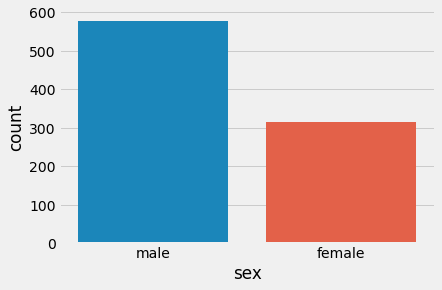

In [15]:
sns.countplot(data=titanic, x='sex')

In [16]:
titanic.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

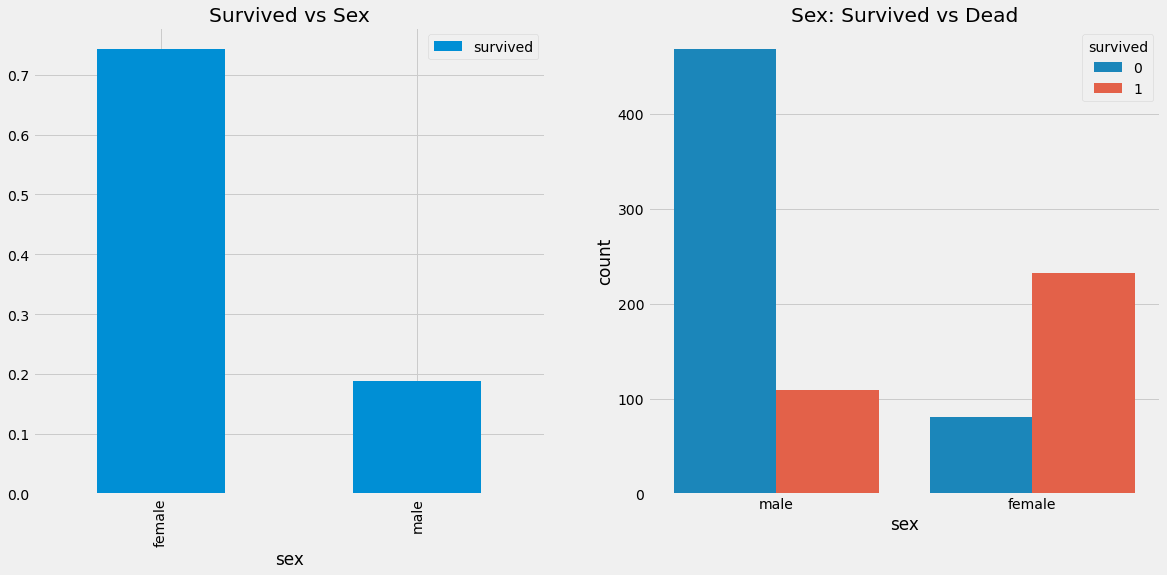

In [22]:
fig, ax = plt.subplots(1,2, figsize=(18,8))

ax[0].set_title('Survived vs Sex')
titanic[['sex', 'survived']].groupby(['sex']).mean().plot.bar(ax=ax[0])

ax[1].set_title('Sex: Survived vs Dead')
sns.countplot(x = 'sex', hue='survived', data=titanic,ax=ax[1])

plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

This looks to be a very important feature for modeling. But is it the best?? Lets check other features.

## 2. Pclass:Ordinal Feature

2. How many `pclass` (Passengers Class) are there in the dataset? Is it the same as the text column `class`?

In [26]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [27]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [30]:
p_class = titanic[['pclass', 'class']]
p_class.head()

,pclass,class
0,3,Third
1,1,First
2,3,Third
3,1,First
4,3,Third


It appears that both of this columns are the same except that one is numeric and the other is text

In [34]:
pd.crosstab(titanic['pclass'], titanic['survived'],margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


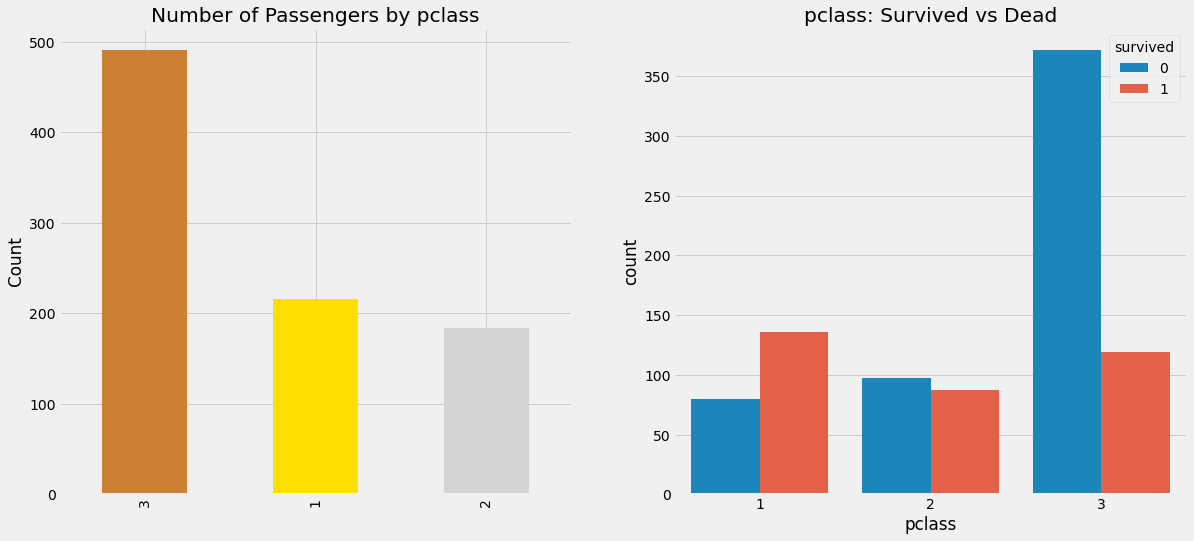

In [38]:
fig,ax = plt.subplots(1,2, figsize=(18,8))

titanic['pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers by pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='pclass',hue='survived', data=titanic,ax=ax[1])
ax[1].set_title('pclass: Survived vs Dead')

plt.show()

People say **Money Can't Buy Everything** . But we clearly can see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 % survived is around 63% while for Pclass 2 is around 48%. So money and status matters. Such a materialistic world.

Let's dive in little bit more and check for other interesting observations. Lets check survival rate with Sex and Pclass Together.

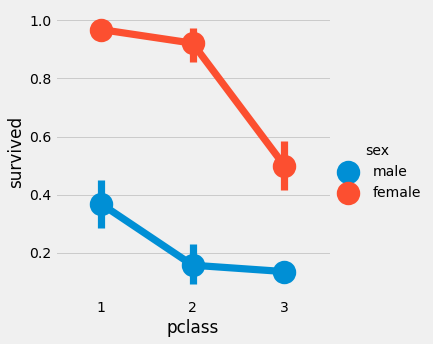

In [39]:
sns.catplot(x ='pclass', y = 'survived', hue='sex', data=titanic, kind='point')

We use FactorPlot in this case, because they make the seperation of categorical values easy.

Looking at the CrossTab and the FactorPlot, we can easily infer that survival for Women from `Pclass` 1 is about `95-96%`, as only 3 out of 94 Women from `Pclass` 1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass 1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.

## 3. Age: Continous Feature

In [41]:
print('The oldest Passenger was: ',titanic['age'].max(), 'years')
print('The Youngest Passenger was of : ',titanic['age'].min(), 'years')
print('The Average Age of the Passenger on the ship was: ',round(titanic['age'].mean(), 2), 'years')

The oldest Passenger was:  80.0 years
The Youngest Passenger was of :  0.42 years
The Average Age of the Passenger on the ship was:  29.7 years


Show the passengers who were less than 20 years

In [42]:
less_than_20 = titanic[titanic['age']<20]
less_than_20.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False


In [44]:
len(less_than_20)

164

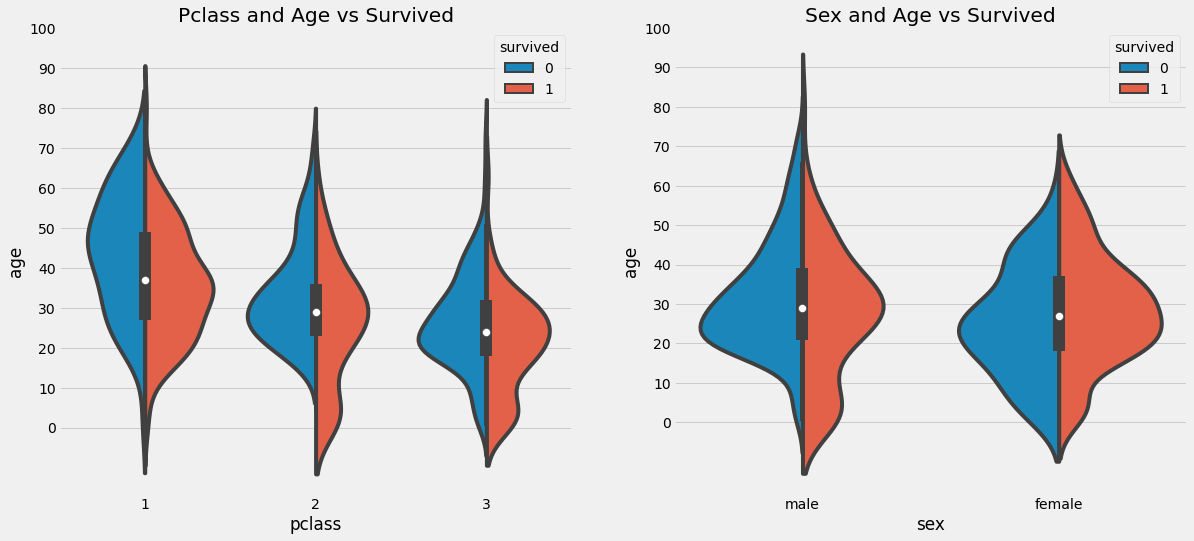

In [49]:
fig,ax=plt.subplots(1,2, figsize=(18,8))

sns.violinplot(x='pclass', y='age', hue='survived', data=titanic,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x='sex', y='age', hue='survived', data=titanic,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

#### Observations:

1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2) Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.

3) For males, the survival chances decreases with an increase in age.

4) Who: Categorical Feature<br>
Let's find out the categories of the passengers in the column who. Using Pie chart to illustrate their values

## 4. Who: Categorical Feature

Let's find out the categories of the passengers in the column `who`. Using Pie charts to illustrate thier values

In [50]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

<AxesSubplot:ylabel='who'>

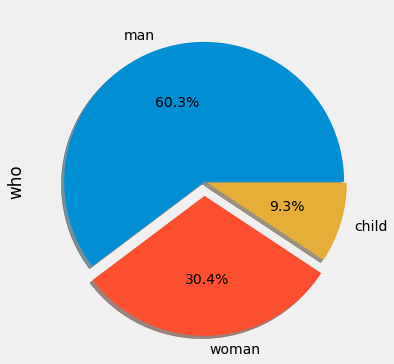

In [6]:
plt.figure(figsize=(10,6))
titanic['who'].value_counts().plot.pie(explode=[0,0.1, 0.02],  autopct='%1.1f%%',shadow=True)


## 5. Embarked: Categorical Value

How many unique cities are there in the column `embark_town?` Plot thier occurences

In [64]:
titanic['embark_town'].nunique()

3

<AxesSubplot:>

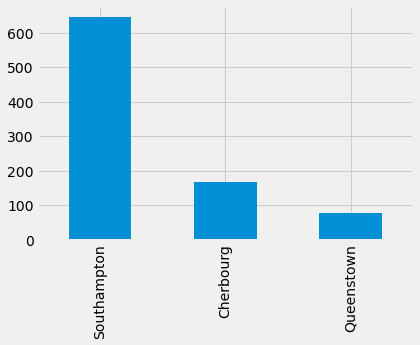

In [65]:
titanic['embark_town'].value_counts().plot(kind='bar')

In [66]:
pd.crosstab([titanic['embarked'], titanic['pclass']],[titanic['sex'],titanic['survived']]
            ,margins=True).style.background_gradient(cmap='summer_r')

**chances for survival by port of Embarkation**

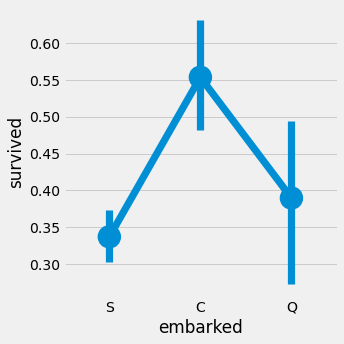

In [67]:
sns.catplot(x = 'embarked', y='survived', data=titanic, kind='point')

**The Chance for survival for Port C is highest around 0.55 while it is lowest for S** 

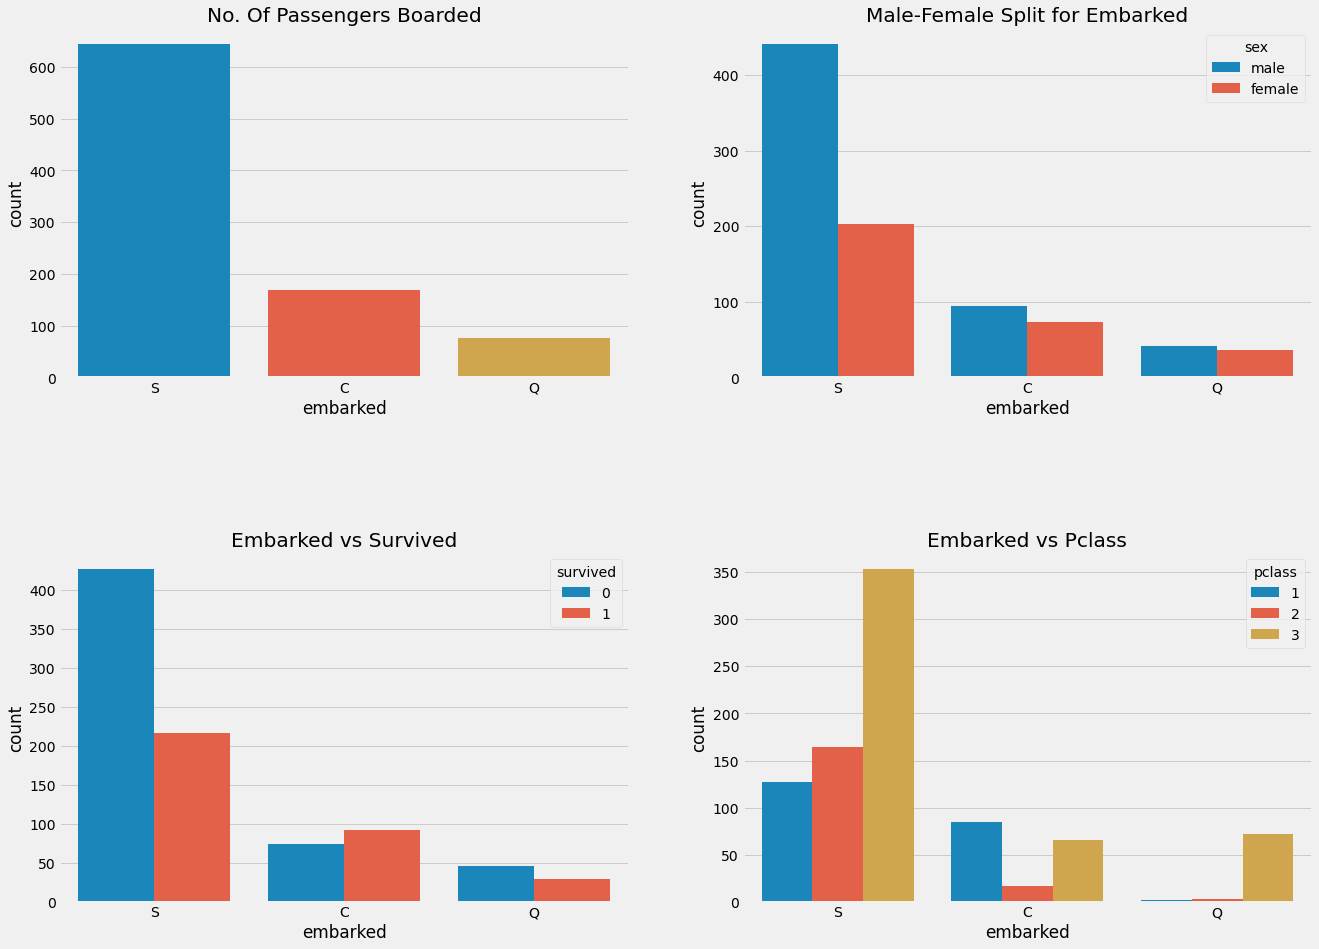

In [69]:
fig,ax = plt.subplots(2,2,figsize=(20,15))

ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x = 'embarked', data=titanic, ax=ax[0,0])

ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x = 'embarked', hue='sex', data=titanic, ax=ax[0,1])

ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x = 'embarked', hue='survived', data=titanic, ax=ax[1,0])

ax[1,1].set_title('Embarked vs Pclass')
sns.countplot(x = 'embarked', hue='pclass', data=titanic, ax=ax[1,1])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()



The Age, Cabin and Embarked columns have null values, we'll try to fix them

<a name='6'></a>
# 6. Missing Data

In [71]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

There are missing data in age, embark_town, and deck columns. We can also use heatmaps to show the missing values

<AxesSubplot:>

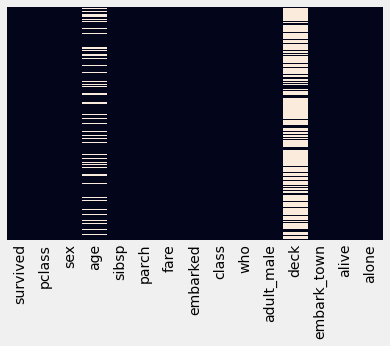

In [75]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False)

As we had seen earlier, the Age feature has **177** null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

**Bingo!!!!** , we can check the **who** feature.

<a name='7'></a>
# 7. More Analysis

<AxesSubplot:xlabel='survived', ylabel='count'>

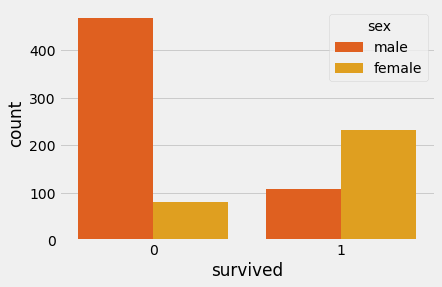

In [78]:
sns.countplot(data=titanic, x='survived', palette='autumn', hue='sex')

<AxesSubplot:xlabel='survived', ylabel='count'>

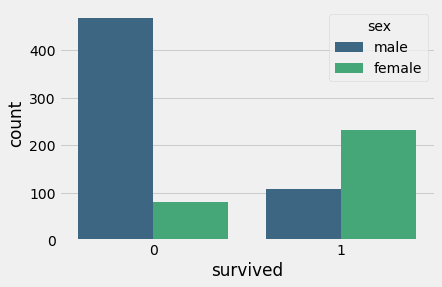

In [79]:
sns.countplot(data=titanic, x='survived', palette='viridis', hue='sex')

<AxesSubplot:ylabel='Frequency'>

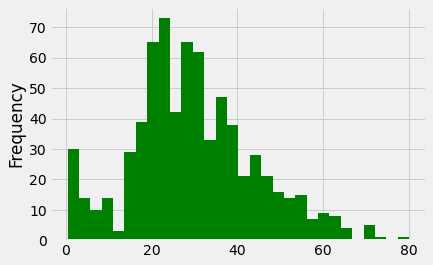

In [80]:
titanic.age.plot(kind='hist',bins=30,color='green')

<AxesSubplot:xlabel='age', ylabel='fare'>

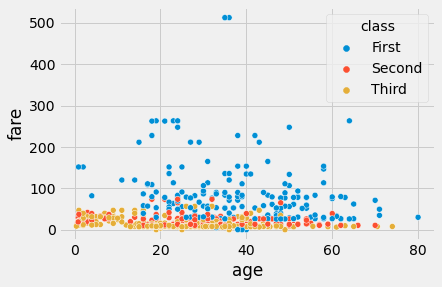

In [81]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='class')

That is obvious. The passengers who were in the first class paid more than the other classes. And many females were in the first class

<AxesSubplot:xlabel='age', ylabel='fare'>

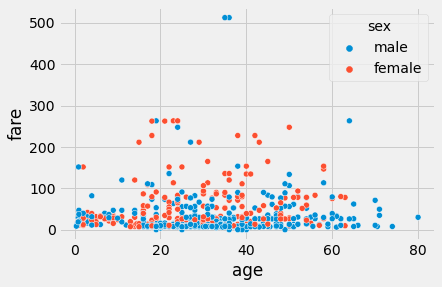

In [82]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex')

The purpose of this lab was to learn about the exploratory analysis. There is no limit to what you can do. The more time you spend with the data, the good your analysis will be. I used questions to make it simple and lead the way but there is no proper format for this. The goal is to be one with data (CC: Andrej).

<a name='8'></a>
# 8. Checking Correlating Features
Checking correlation can help you to see the similarity between features. If two features correlate, that means they contain the same information and if one of them is removed, the analysis/model can be less affected.

In [84]:
correlation = titanic.corr()
correlation

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [85]:
correlation['survived']

survived      1.000000
pclass       -0.338481
age          -0.077221
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64

<AxesSubplot:>

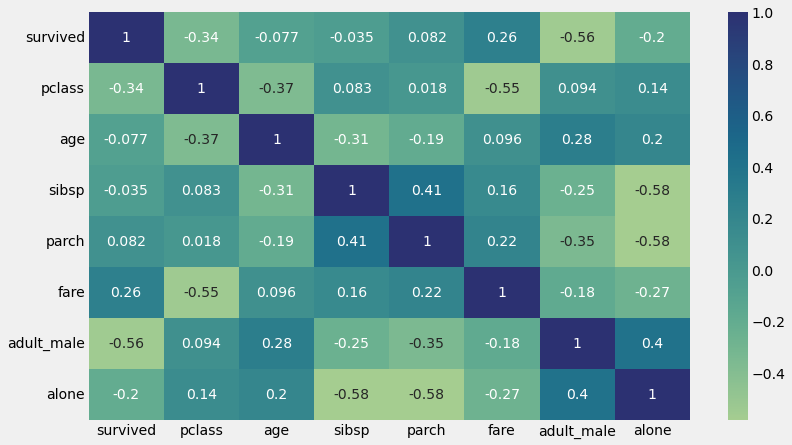

In [86]:
##33 Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(correlation, annot=True,cmap='crest')

This is the end of this lab